In [1]:
import geopandas as gpd
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

C:\Users\ajimp\AppData\Roaming\Python\Python38\site-packages\geopandas\_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
<ipython-input-1-4b47e4806450>:1: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migratio

In [2]:
df_fe_crimes = pd.read_csv(
    'Data\Processed_Datasets\Combined_tables\df_fe_crimes.csv', index_col=0)
df_fe_incidents = pd.read_csv(
    'Data\Processed_Datasets\Combined_tables\df_fe_incidents.csv', index_col=0)
df_fe_population = pd.read_csv(
    'Data\Processed_Datasets\Combined_tables\df_fe_population.csv', index_col=0)
df_fe_property_assessments = pd.read_csv(
    'Data\Processed_Datasets\Combined_tables\df_fe_property_assessments.csv', index_col=0)
df_fe_weather = pd.read_csv(
    'Data\Processed_Datasets\Combined_tables\df_fe_weather.csv', index_col=0)

In [3]:
df_fe_crimes.shape

(69258, 10)

In [4]:
df_fe_incidents.shape

(69258, 16)

In [5]:
df_fe_population.shape

(442, 5)

In [6]:
df_fe_property_assessments.shape

(34, 9)

In [7]:
df_fe_weather.shape

(69258, 13)

### Combine incidents, crimes and weather dataframes

In [8]:
df_fe_crimes = df_fe_crimes.sort_values(['1000_GRID_ID', 'MONTH'])
df_fe_incidents = df_fe_incidents.sort_values(['1000_GRID_ID', 'MONTH'])
df_fe_weather = df_fe_weather.sort_values(['1000_GRID_ID', 'MONTH'])

In [9]:
df_combined = pd.merge(df_fe_crimes,
                       df_fe_incidents,
                       on=['1000_GRID_ID',
                           'MONTH',
                           'CODEMAMROT'])
df_combined = pd.merge(df_combined,
                       df_fe_weather,
                       on=['1000_GRID_ID',
                           'MONTH'])

In [10]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69258 entries, 0 to 69257
Data columns (total 34 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   1000_GRID_ID                                  69258 non-null  object 
 1   MONTH                                         69258 non-null  object 
 2   CODEMAMROT                                    69258 non-null  object 
 3   CRIME_COUNT                                   69258 non-null  float64
 4   Infractions entrainant la mort_CRIME_COUNT    69258 non-null  float64
 5   Introduction_CRIME_COUNT                      69258 non-null  float64
 6   Méfait_CRIME_COUNT                            69258 non-null  float64
 7   Vol dans / sur véhicule à moteur_CRIME_COUNT  69258 non-null  float64
 8   Vol de véhicule à moteur_CRIME_COUNT          69258 non-null  float64
 9   Vols qualifiés_CRIME_COUNT                    69258 non-null 

In [11]:
df_combined.describe(include='all')

,1000_GRID_ID,MONTH,CODEMAMROT,CRIME_COUNT,Infractions entrainant la mort_CRIME_COUNT,Introduction_CRIME_COUNT,Méfait_CRIME_COUNT,Vol dans / sur véhicule à moteur_CRIME_COUNT,Vol de véhicule à moteur_CRIME_COUNT,Vols qualifiés_CRIME_COUNT,...,temperature_2m_min (°C)_MEAN,temperature_2m_mean (°C)_MEAN,shortwave_radiation_sum (MJ/m²)_MEAN,precipitation_sum (mm)_MEAN,rain_sum (mm)_MEAN,snowfall_sum (cm)_MEAN,windspeed_10m_max (km/h)_MEAN,windgusts_10m_max (km/h)_MEAN,winddirection_10m_dominant (°)_MEAN,et0_fao_evapotranspiration (mm)_MEAN
count,69258,69258,69258,69258.000000,69258.000000,69258.000000,69258.000000,69258.000000,69258.000000,69258.000000,...,69258.000000,69258.000000,69258.000000,69258.000000,69258.000000,69258.000000,69258.000000,69258.000000,69258.000000,69258.000000
unique,714,97,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,YnBvkIHPHFg=,2017-07,REM33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,97,714,5723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2.929019,0.002671,0.842589,0.640114,0.773802,0.514525,0.155318,...,1.936690,6.328974,13.378336,3.224913,2.560241,0.488494,17.245313,37.760343,198.752586,2.163834
std,NaN,NaN,NaN,5.416797,0.052995,1.990643,1.531543,1.907677,1.150850,0.557069,...,11.461446,11.316277,6.600557,2.738234,2.681267,0.885075,2.814208,5.998632,40.319598,1.522752
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-31.400000,-25.400000,0.460000,0.000000,0.000000,0.000000,5.500000,10.800000,0.000000,0.110000
25%,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-8.150000,-3.830000,6.760167,1.670968,0.800000,0.000000,15.390323,34.600000,178.800000,0.678667
50%,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.451364,6.588889,13.572333,2.887097,2.153333,0.019091,17.150000,37.467742,201.250000,1.735635
75%,NaN,NaN,NaN,4.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,12.906401,17.200000,19.056209,4.033333,3.520000,0.760968,18.759217,40.875893,220.962963,3.594194


In [12]:
print(df_combined.isnull().any())

1000_GRID_ID                                    False
MONTH                                           False
CODEMAMROT                                      False
CRIME_COUNT                                     False
Infractions entrainant la mort_CRIME_COUNT      False
Introduction_CRIME_COUNT                        False
Méfait_CRIME_COUNT                              False
Vol dans / sur véhicule à moteur_CRIME_COUNT    False
Vol de véhicule à moteur_CRIME_COUNT            False
Vols qualifiés_CRIME_COUNT                      False
INCIDENT_COUNT                                  False
1-REPOND_INCIDENT_COUNT                         False
AUTREFEU_INCIDENT_COUNT                         False
Alarmes-incendies_INCIDENT_COUNT                False
FAU-ALER_INCIDENT_COUNT                         False
INCENDIE_INCIDENT_COUNT                         False
NOUVEAU_INCIDENT_COUNT                          False
SANS FEU_INCIDENT_COUNT                         False
FIRE_INCIDENT_COUNT         

### Add property assessment features to combined table

In [13]:
df_fe_property_assessments = df_fe_property_assessments.sort_values(['CODEMAMROT'])

In [14]:
df_combined = df_combined.merge(df_fe_property_assessments,
                        on='CODEMAMROT',
                        how='left')

In [15]:
# Extract the year from the month
df_combined['YEAR'] = df_combined['MONTH'].str[:4].astype(int)

In [16]:
df_combined.dtypes

1000_GRID_ID                                     object
MONTH                                            object
CODEMAMROT                                       object
CRIME_COUNT                                     float64
Infractions entrainant la mort_CRIME_COUNT      float64
Introduction_CRIME_COUNT                        float64
Méfait_CRIME_COUNT                              float64
Vol dans / sur véhicule à moteur_CRIME_COUNT    float64
Vol de véhicule à moteur_CRIME_COUNT            float64
Vols qualifiés_CRIME_COUNT                      float64
INCIDENT_COUNT                                  float64
1-REPOND_INCIDENT_COUNT                         float64
AUTREFEU_INCIDENT_COUNT                         float64
Alarmes-incendies_INCIDENT_COUNT                float64
FAU-ALER_INCIDENT_COUNT                         float64
INCENDIE_INCIDENT_COUNT                         float64
NOUVEAU_INCIDENT_COUNT                          float64
SANS FEU_INCIDENT_COUNT                         

In [17]:
df_combined.describe(include='all')

,1000_GRID_ID,MONTH,CODEMAMROT,CRIME_COUNT,Infractions entrainant la mort_CRIME_COUNT,Introduction_CRIME_COUNT,Méfait_CRIME_COUNT,Vol dans / sur véhicule à moteur_CRIME_COUNT,Vol de véhicule à moteur_CRIME_COUNT,Vols qualifiés_CRIME_COUNT,...,et0_fao_evapotranspiration (mm)_MEAN,PROPERTY_ASSESSMENT_COUNT,Condominium_PROPERTY_ASSESSMENT_COUNT,Régulier_PROPERTY_ASSESSMENT_COUNT,HEIGHT_ABOVE_GROUND_MEAN,DWELLING_MEAN,CONSTRUCTION_YEAR_MEAN,LAND_AREA_MEAN,BUILDING_AREA_MEAN,YEAR
count,69258,69258,69258,69258.000000,69258.000000,69258.000000,69258.000000,69258.000000,69258.000000,69258.000000,...,69258.000000,69258.000000,69258.000000,69258.000000,69258.000000,69258.000000,69258.000000,69258.000000,69258.000000,69258.000000
unique,714,97,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,YnBvkIHPHFg=,2017-07,REM33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,97,714,5723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2.929019,0.002671,0.842589,0.640114,0.773802,0.514525,0.155318,...,2.163834,18529.492997,6432.859944,12096.598039,1.645043,1.899996,1971.852874,1792.563052,675.343752,2018.546392
std,NaN,NaN,NaN,5.416797,0.052995,1.990643,1.531543,1.907677,1.150850,0.557069,...,1.522752,11426.868309,6998.873560,7237.340517,0.127059,0.606797,9.972359,2603.085215,519.610644,2.324342
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.110000,74.000000,0.000000,74.000000,1.052632,1.000000,1932.048753,218.302654,100.568966,2015.000000
25%,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.678667,7092.000000,1626.000000,6389.000000,1.549198,1.434260,1966.249957,602.361625,310.166871,2017.000000
50%,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.735635,18816.000000,3868.000000,10733.000000,1.638386,1.887186,1972.693531,1029.529479,467.044265,2019.000000
75%,NaN,NaN,NaN,4.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,3.594194,27747.000000,9477.000000,18270.000000,1.755742,2.296771,1979.474658,1317.279161,847.813642,2021.000000


In [18]:
print(df_combined.isnull().any())

1000_GRID_ID                                    False
MONTH                                           False
CODEMAMROT                                      False
CRIME_COUNT                                     False
Infractions entrainant la mort_CRIME_COUNT      False
Introduction_CRIME_COUNT                        False
Méfait_CRIME_COUNT                              False
Vol dans / sur véhicule à moteur_CRIME_COUNT    False
Vol de véhicule à moteur_CRIME_COUNT            False
Vols qualifiés_CRIME_COUNT                      False
INCIDENT_COUNT                                  False
1-REPOND_INCIDENT_COUNT                         False
AUTREFEU_INCIDENT_COUNT                         False
Alarmes-incendies_INCIDENT_COUNT                False
FAU-ALER_INCIDENT_COUNT                         False
INCENDIE_INCIDENT_COUNT                         False
NOUVEAU_INCIDENT_COUNT                          False
SANS FEU_INCIDENT_COUNT                         False
FIRE_INCIDENT_COUNT         

### Add demographic feature to combined table

In [19]:
df_fe_population = df_fe_population.sort_values(['CODEMAMROT',
                                                'YEAR'])

In [20]:
df_combined = pd.merge(df_combined,
                    df_fe_population,
                    on=['CODEMAMROT','YEAR'],
                    how='left')

In [21]:
df_combined.describe(include='all')

,1000_GRID_ID,MONTH,CODEMAMROT,CRIME_COUNT,Infractions entrainant la mort_CRIME_COUNT,Introduction_CRIME_COUNT,Méfait_CRIME_COUNT,Vol dans / sur véhicule à moteur_CRIME_COUNT,Vol de véhicule à moteur_CRIME_COUNT,Vols qualifiés_CRIME_COUNT,...,Régulier_PROPERTY_ASSESSMENT_COUNT,HEIGHT_ABOVE_GROUND_MEAN,DWELLING_MEAN,CONSTRUCTION_YEAR_MEAN,LAND_AREA_MEAN,BUILDING_AREA_MEAN,YEAR,POPULATION_SUM,AIRE,POPULATION_DENSITY
count,69258,69258,69258,69258.000000,69258.000000,69258.000000,69258.000000,69258.000000,69258.000000,69258.000000,...,69258.000000,69258.000000,69258.000000,69258.000000,69258.000000,69258.000000,69258.000000,69258.000000,6.925800e+04,69258.000000
unique,714,97,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,YnBvkIHPHFg=,2017-07,REM33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,97,714,5723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2.929019,0.002671,0.842589,0.640114,0.773802,0.514525,0.155318,...,12096.598039,1.645043,1.899996,1971.852874,1792.563052,675.343752,2018.546392,70325.574923,2.640680e+07,0.003032
std,NaN,NaN,NaN,5.416797,0.052995,1.990643,1.531543,1.907677,1.150850,0.557069,...,7237.340517,0.127059,0.606797,9.972359,2603.085215,519.610644,2.324342,47721.576500,1.152269e+07,0.002499
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,74.000000,1.052632,1.000000,1932.048753,218.302654,100.568966,2015.000000,5.000000,1.805089e+05,0.000028
25%,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6389.000000,1.549198,1.434260,1966.249957,602.361625,310.166871,2017.000000,19360.200000,1.860996e+07,0.000911
50%,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10733.000000,1.638386,1.887186,1972.693531,1029.529479,467.044265,2019.000000,70377.000000,2.519727e+07,0.002157
75%,NaN,NaN,NaN,4.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,18270.000000,1.755742,2.296771,1979.474658,1317.279161,847.813642,2021.000000,106743.000000,3.444652e+07,0.004734


In [22]:
df_combined['YEAR'] = df_combined['YEAR'].astype('object')

In [23]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69258 entries, 0 to 69257
Data columns (total 46 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   1000_GRID_ID                                  69258 non-null  object 
 1   MONTH                                         69258 non-null  object 
 2   CODEMAMROT                                    69258 non-null  object 
 3   CRIME_COUNT                                   69258 non-null  float64
 4   Infractions entrainant la mort_CRIME_COUNT    69258 non-null  float64
 5   Introduction_CRIME_COUNT                      69258 non-null  float64
 6   Méfait_CRIME_COUNT                            69258 non-null  float64
 7   Vol dans / sur véhicule à moteur_CRIME_COUNT  69258 non-null  float64
 8   Vol de véhicule à moteur_CRIME_COUNT          69258 non-null  float64
 9   Vols qualifiés_CRIME_COUNT                    69258 non-null 

In [24]:
df_combined.describe(include='all')

,1000_GRID_ID,MONTH,CODEMAMROT,CRIME_COUNT,Infractions entrainant la mort_CRIME_COUNT,Introduction_CRIME_COUNT,Méfait_CRIME_COUNT,Vol dans / sur véhicule à moteur_CRIME_COUNT,Vol de véhicule à moteur_CRIME_COUNT,Vols qualifiés_CRIME_COUNT,...,Régulier_PROPERTY_ASSESSMENT_COUNT,HEIGHT_ABOVE_GROUND_MEAN,DWELLING_MEAN,CONSTRUCTION_YEAR_MEAN,LAND_AREA_MEAN,BUILDING_AREA_MEAN,YEAR,POPULATION_SUM,AIRE,POPULATION_DENSITY
count,69258,69258,69258,69258.000000,69258.000000,69258.000000,69258.000000,69258.000000,69258.000000,69258.000000,...,69258.000000,69258.000000,69258.000000,69258.000000,69258.000000,69258.000000,69258.0,69258.000000,6.925800e+04,69258.000000
unique,714,97,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN
top,YnBvkIHPHFg=,2017-07,REM33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2022.0,NaN,NaN,NaN
freq,97,714,5723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8568.0,NaN,NaN,NaN
mean,NaN,NaN,NaN,2.929019,0.002671,0.842589,0.640114,0.773802,0.514525,0.155318,...,12096.598039,1.645043,1.899996,1971.852874,1792.563052,675.343752,NaN,70325.574923,2.640680e+07,0.003032
std,NaN,NaN,NaN,5.416797,0.052995,1.990643,1.531543,1.907677,1.150850,0.557069,...,7237.340517,0.127059,0.606797,9.972359,2603.085215,519.610644,NaN,47721.576500,1.152269e+07,0.002499
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,74.000000,1.052632,1.000000,1932.048753,218.302654,100.568966,NaN,5.000000,1.805089e+05,0.000028
25%,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6389.000000,1.549198,1.434260,1966.249957,602.361625,310.166871,NaN,19360.200000,1.860996e+07,0.000911
50%,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10733.000000,1.638386,1.887186,1972.693531,1029.529479,467.044265,NaN,70377.000000,2.519727e+07,0.002157
75%,NaN,NaN,NaN,4.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,18270.000000,1.755742,2.296771,1979.474658,1317.279161,847.813642,NaN,106743.000000,3.444652e+07,0.004734


In [25]:
print(df_combined.isnull().any())

1000_GRID_ID                                    False
MONTH                                           False
CODEMAMROT                                      False
CRIME_COUNT                                     False
Infractions entrainant la mort_CRIME_COUNT      False
Introduction_CRIME_COUNT                        False
Méfait_CRIME_COUNT                              False
Vol dans / sur véhicule à moteur_CRIME_COUNT    False
Vol de véhicule à moteur_CRIME_COUNT            False
Vols qualifiés_CRIME_COUNT                      False
INCIDENT_COUNT                                  False
1-REPOND_INCIDENT_COUNT                         False
AUTREFEU_INCIDENT_COUNT                         False
Alarmes-incendies_INCIDENT_COUNT                False
FAU-ALER_INCIDENT_COUNT                         False
INCENDIE_INCIDENT_COUNT                         False
NOUVEAU_INCIDENT_COUNT                          False
SANS FEU_INCIDENT_COUNT                         False
FIRE_INCIDENT_COUNT         

### Add 4 month lag features for all incident and crime features

In [26]:
df_combined.columns

Index(['1000_GRID_ID', 'MONTH', 'CODEMAMROT', 'CRIME_COUNT',
       'Infractions entrainant la mort_CRIME_COUNT',
       'Introduction_CRIME_COUNT', 'Méfait_CRIME_COUNT',
       'Vol dans / sur véhicule à moteur_CRIME_COUNT',
       'Vol de véhicule à moteur_CRIME_COUNT', 'Vols qualifiés_CRIME_COUNT',
       'INCIDENT_COUNT', '1-REPOND_INCIDENT_COUNT', 'AUTREFEU_INCIDENT_COUNT',
       'Alarmes-incendies_INCIDENT_COUNT', 'FAU-ALER_INCIDENT_COUNT',
       'INCENDIE_INCIDENT_COUNT', 'NOUVEAU_INCIDENT_COUNT',
       'SANS FEU_INCIDENT_COUNT', 'FIRE_INCIDENT_COUNT',
       'UNIQUE_FIRE_STATION_COUNT', 'UNIQUE_DIVISION_COUNT',
       'UNITS_DEPLOYED_SUM', 'UNITS_DEPLOYED_MEAN',
       'temperature_2m_max (°C)_MEAN', 'temperature_2m_min (°C)_MEAN',
       'temperature_2m_mean (°C)_MEAN', 'shortwave_radiation_sum (MJ/m²)_MEAN',
       'precipitation_sum (mm)_MEAN', 'rain_sum (mm)_MEAN',
       'snowfall_sum (cm)_MEAN', 'windspeed_10m_max (km/h)_MEAN',
       'windgusts_10m_max (km/h)_MEAN', '

In [27]:
feature_column_to_shift_names = ['CRIME_COUNT', 'Infractions entrainant la mort_CRIME_COUNT',
                                 'Introduction_CRIME_COUNT', 'Méfait_CRIME_COUNT',
                                 'Vol dans / sur véhicule à moteur_CRIME_COUNT',
                                 'Vol de véhicule à moteur_CRIME_COUNT', 'Vols qualifiés_CRIME_COUNT',
                                 'INCIDENT_COUNT', '1-REPOND_INCIDENT_COUNT', 'AUTREFEU_INCIDENT_COUNT',
                                 'Alarmes-incendies_INCIDENT_COUNT', 'FAU-ALER_INCIDENT_COUNT',
                                 'INCENDIE_INCIDENT_COUNT', 'NOUVEAU_INCIDENT_COUNT',
                                 'SANS FEU_INCIDENT_COUNT', 'FIRE_INCIDENT_COUNT',
                                 'UNIQUE_FIRE_STATION_COUNT', 'UNIQUE_DIVISION_COUNT',
                                 'UNITS_DEPLOYED_SUM', 'UNITS_DEPLOYED_MEAN']

In [28]:
def shift_feature_by_group(df, col):
    shifted_col_name = f"{col}_4_MONTH_BACKWARD_SHIFT"
    df[shifted_col_name] = df.groupby(['1000_GRID_ID'])[col].shift(4)
    return df

In [29]:
df_combined = df_combined.sort_values(['1000_GRID_ID', 'MONTH'])
for col in feature_column_to_shift_names:
    df_combined = shift_feature_by_group(df_combined, col)

In [30]:
df_combined.describe(include='all')

,1000_GRID_ID,MONTH,CODEMAMROT,CRIME_COUNT,Infractions entrainant la mort_CRIME_COUNT,Introduction_CRIME_COUNT,Méfait_CRIME_COUNT,Vol dans / sur véhicule à moteur_CRIME_COUNT,Vol de véhicule à moteur_CRIME_COUNT,Vols qualifiés_CRIME_COUNT,...,Alarmes-incendies_INCIDENT_COUNT_4_MONTH_BACKWARD_SHIFT,FAU-ALER_INCIDENT_COUNT_4_MONTH_BACKWARD_SHIFT,INCENDIE_INCIDENT_COUNT_4_MONTH_BACKWARD_SHIFT,NOUVEAU_INCIDENT_COUNT_4_MONTH_BACKWARD_SHIFT,SANS FEU_INCIDENT_COUNT_4_MONTH_BACKWARD_SHIFT,FIRE_INCIDENT_COUNT_4_MONTH_BACKWARD_SHIFT,UNIQUE_FIRE_STATION_COUNT_4_MONTH_BACKWARD_SHIFT,UNIQUE_DIVISION_COUNT_4_MONTH_BACKWARD_SHIFT,UNITS_DEPLOYED_SUM_4_MONTH_BACKWARD_SHIFT,UNITS_DEPLOYED_MEAN_4_MONTH_BACKWARD_SHIFT
count,69258,69258,69258,69258.000000,69258.000000,69258.000000,69258.000000,69258.000000,69258.000000,69258.000000,...,66402.000000,66402.000000,66402.000000,66402.000000,66402.000000,66402.000000,66402.000000,66402.000000,66402.000000,66402.000000
unique,714,97,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,YnBvkIHPHFg=,2017-07,REM33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,97,714,5723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2.929019,0.002671,0.842589,0.640114,0.773802,0.514525,0.155318,...,1.552830,0.010903,0.143279,0.000045,2.422834,2.034005,1.048417,0.797747,23.495587,1.322145
std,NaN,NaN,NaN,5.416797,0.052995,1.990643,1.531543,1.907677,1.150850,0.557069,...,3.020926,0.108112,0.438897,0.006721,4.014227,3.657048,0.919587,0.622487,37.577010,1.286483
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.394737
75%,NaN,NaN,NaN,4.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,3.000000,3.000000,2.000000,1.000000,32.000000,1.927225


In [31]:
df_combined[df_combined['MONTH']=='2015-03']

,1000_GRID_ID,MONTH,CODEMAMROT,CRIME_COUNT,Infractions entrainant la mort_CRIME_COUNT,Introduction_CRIME_COUNT,Méfait_CRIME_COUNT,Vol dans / sur véhicule à moteur_CRIME_COUNT,Vol de véhicule à moteur_CRIME_COUNT,Vols qualifiés_CRIME_COUNT,...,Alarmes-incendies_INCIDENT_COUNT_4_MONTH_BACKWARD_SHIFT,FAU-ALER_INCIDENT_COUNT_4_MONTH_BACKWARD_SHIFT,INCENDIE_INCIDENT_COUNT_4_MONTH_BACKWARD_SHIFT,NOUVEAU_INCIDENT_COUNT_4_MONTH_BACKWARD_SHIFT,SANS FEU_INCIDENT_COUNT_4_MONTH_BACKWARD_SHIFT,FIRE_INCIDENT_COUNT_4_MONTH_BACKWARD_SHIFT,UNIQUE_FIRE_STATION_COUNT_4_MONTH_BACKWARD_SHIFT,UNIQUE_DIVISION_COUNT_4_MONTH_BACKWARD_SHIFT,UNITS_DEPLOYED_SUM_4_MONTH_BACKWARD_SHIFT,UNITS_DEPLOYED_MEAN_4_MONTH_BACKWARD_SHIFT
2,-1xcNei0iJs=,2015-03,REM34,13.0,0.0,5.0,4.0,2.0,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,-5jH5xsoao4=,2015-03,REM15,5.0,0.0,1.0,2.0,2.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,-HbRtrodjf8=,2015-03,66107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
293,-VjiKSd8OxM=,2015-03,REM34,4.0,0.0,3.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
390,-fjD6s-8vdo=,2015-03,REM22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68775,zZMpExLs4dw=,2015-03,66062,3.0,0.0,1.0,2.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68872,zsOtd-zvzaI=,2015-03,REM20,10.0,0.0,6.0,1.0,1.0,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68969,zsz3DbEvcrg=,2015-03,REM25,5.0,0.0,2.0,3.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69066,ztpTb_cD1hM=,2015-03,66007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Generate average number of fire incidents per quarter

In [32]:
# Use rolling window to find average fire incidents per quarter, including current row
df_combined = df_combined.sort_values(['1000_GRID_ID', 'MONTH'])
rolling_window = df_combined.groupby(
    '1000_GRID_ID')['FIRE_INCIDENT_COUNT'].rolling(window=4)
df_combined['FIRE_INCIDENT_QUATERLY_MEAN'] = rolling_window.mean(
).reset_index(drop=True)


In [33]:
df_combined.describe(include='all')

,1000_GRID_ID,MONTH,CODEMAMROT,CRIME_COUNT,Infractions entrainant la mort_CRIME_COUNT,Introduction_CRIME_COUNT,Méfait_CRIME_COUNT,Vol dans / sur véhicule à moteur_CRIME_COUNT,Vol de véhicule à moteur_CRIME_COUNT,Vols qualifiés_CRIME_COUNT,...,FAU-ALER_INCIDENT_COUNT_4_MONTH_BACKWARD_SHIFT,INCENDIE_INCIDENT_COUNT_4_MONTH_BACKWARD_SHIFT,NOUVEAU_INCIDENT_COUNT_4_MONTH_BACKWARD_SHIFT,SANS FEU_INCIDENT_COUNT_4_MONTH_BACKWARD_SHIFT,FIRE_INCIDENT_COUNT_4_MONTH_BACKWARD_SHIFT,UNIQUE_FIRE_STATION_COUNT_4_MONTH_BACKWARD_SHIFT,UNIQUE_DIVISION_COUNT_4_MONTH_BACKWARD_SHIFT,UNITS_DEPLOYED_SUM_4_MONTH_BACKWARD_SHIFT,UNITS_DEPLOYED_MEAN_4_MONTH_BACKWARD_SHIFT,FIRE_INCIDENT_QUATERLY_MEAN
count,69258,69258,69258,69258.000000,69258.000000,69258.000000,69258.000000,69258.000000,69258.000000,69258.000000,...,66402.000000,66402.000000,66402.000000,66402.000000,66402.000000,66402.000000,66402.000000,66402.000000,66402.000000,67116.000000
unique,714,97,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,YnBvkIHPHFg=,2017-07,REM33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,97,714,5723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2.929019,0.002671,0.842589,0.640114,0.773802,0.514525,0.155318,...,0.010903,0.143279,0.000045,2.422834,2.034005,1.048417,0.797747,23.495587,1.322145,2.038411
std,NaN,NaN,NaN,5.416797,0.052995,1.990643,1.531543,1.907677,1.150850,0.557069,...,0.108112,0.438897,0.006721,4.014227,3.657048,0.919587,0.622487,37.577010,1.286483,3.385137
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.394737,0.750000
75%,NaN,NaN,NaN,4.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,3.000000,3.000000,2.000000,1.000000,32.000000,1.927225,2.750000


### Generate total number of fire incidents per quarter

In [34]:
df_combined = df_combined.sort_values(['1000_GRID_ID', 'MONTH'])
rolling_window = df_combined.groupby(
    '1000_GRID_ID')['FIRE_INCIDENT_COUNT'].rolling(window=4)
df_combined['FIRE_INCIDENT_QUATERLY_TOTAL'] = rolling_window.sum(
).reset_index(drop=True)

In [35]:
df_combined.describe(include='all')

,1000_GRID_ID,MONTH,CODEMAMROT,CRIME_COUNT,Infractions entrainant la mort_CRIME_COUNT,Introduction_CRIME_COUNT,Méfait_CRIME_COUNT,Vol dans / sur véhicule à moteur_CRIME_COUNT,Vol de véhicule à moteur_CRIME_COUNT,Vols qualifiés_CRIME_COUNT,...,INCENDIE_INCIDENT_COUNT_4_MONTH_BACKWARD_SHIFT,NOUVEAU_INCIDENT_COUNT_4_MONTH_BACKWARD_SHIFT,SANS FEU_INCIDENT_COUNT_4_MONTH_BACKWARD_SHIFT,FIRE_INCIDENT_COUNT_4_MONTH_BACKWARD_SHIFT,UNIQUE_FIRE_STATION_COUNT_4_MONTH_BACKWARD_SHIFT,UNIQUE_DIVISION_COUNT_4_MONTH_BACKWARD_SHIFT,UNITS_DEPLOYED_SUM_4_MONTH_BACKWARD_SHIFT,UNITS_DEPLOYED_MEAN_4_MONTH_BACKWARD_SHIFT,FIRE_INCIDENT_QUATERLY_MEAN,FIRE_INCIDENT_QUATERLY_TOTAL
count,69258,69258,69258,69258.000000,69258.000000,69258.000000,69258.000000,69258.000000,69258.000000,69258.000000,...,66402.000000,66402.000000,66402.000000,66402.000000,66402.000000,66402.000000,66402.000000,66402.000000,67116.000000,67116.000000
unique,714,97,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,YnBvkIHPHFg=,2017-07,REM33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,97,714,5723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2.929019,0.002671,0.842589,0.640114,0.773802,0.514525,0.155318,...,0.143279,0.000045,2.422834,2.034005,1.048417,0.797747,23.495587,1.322145,2.038411,8.153644
std,NaN,NaN,NaN,5.416797,0.052995,1.990643,1.531543,1.907677,1.150850,0.557069,...,0.438897,0.006721,4.014227,3.657048,0.919587,0.622487,37.577010,1.286483,3.385137,13.540549
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.394737,0.750000,3.000000
75%,NaN,NaN,NaN,4.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,3.000000,3.000000,2.000000,1.000000,32.000000,1.927225,2.750000,11.000000


### Generate Max number of fire incidents per quarter

In [36]:
df_combined = df_combined.sort_values(['1000_GRID_ID', 'MONTH'])
rolling_window = df_combined.groupby(
    '1000_GRID_ID')['FIRE_INCIDENT_COUNT'].rolling(window=4)
df_combined['FIRE_INCIDENT_QUATERLY_MAX'] = rolling_window.max(
).reset_index(drop=True)


In [37]:
df_combined.describe(include='all')

,1000_GRID_ID,MONTH,CODEMAMROT,CRIME_COUNT,Infractions entrainant la mort_CRIME_COUNT,Introduction_CRIME_COUNT,Méfait_CRIME_COUNT,Vol dans / sur véhicule à moteur_CRIME_COUNT,Vol de véhicule à moteur_CRIME_COUNT,Vols qualifiés_CRIME_COUNT,...,NOUVEAU_INCIDENT_COUNT_4_MONTH_BACKWARD_SHIFT,SANS FEU_INCIDENT_COUNT_4_MONTH_BACKWARD_SHIFT,FIRE_INCIDENT_COUNT_4_MONTH_BACKWARD_SHIFT,UNIQUE_FIRE_STATION_COUNT_4_MONTH_BACKWARD_SHIFT,UNIQUE_DIVISION_COUNT_4_MONTH_BACKWARD_SHIFT,UNITS_DEPLOYED_SUM_4_MONTH_BACKWARD_SHIFT,UNITS_DEPLOYED_MEAN_4_MONTH_BACKWARD_SHIFT,FIRE_INCIDENT_QUATERLY_MEAN,FIRE_INCIDENT_QUATERLY_TOTAL,FIRE_INCIDENT_QUATERLY_MAX
count,69258,69258,69258,69258.000000,69258.000000,69258.000000,69258.000000,69258.000000,69258.000000,69258.000000,...,66402.000000,66402.000000,66402.000000,66402.000000,66402.000000,66402.000000,66402.000000,67116.000000,67116.000000,67116.000000
unique,714,97,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,YnBvkIHPHFg=,2017-07,REM33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,97,714,5723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2.929019,0.002671,0.842589,0.640114,0.773802,0.514525,0.155318,...,0.000045,2.422834,2.034005,1.048417,0.797747,23.495587,1.322145,2.038411,8.153644,3.300420
std,NaN,NaN,NaN,5.416797,0.052995,1.990643,1.531543,1.907677,1.150850,0.557069,...,0.006721,4.014227,3.657048,0.919587,0.622487,37.577010,1.286483,3.385137,13.540549,4.632789
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.394737,0.750000,3.000000,2.000000
75%,NaN,NaN,NaN,4.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,3.000000,3.000000,2.000000,1.000000,32.000000,1.927225,2.750000,11.000000,5.000000


### Generate total number of crime counts per quarter

In [38]:
df_combined = df_combined.sort_values(['1000_GRID_ID', 'MONTH'])
rolling_window = df_combined.groupby(
    '1000_GRID_ID')['CRIME_COUNT'].rolling(window=4)
df_combined['CRIME_COUNT_QUATERLY_TOTAL'] = rolling_window.sum(
).reset_index(drop=True)

In [39]:
df_combined.describe(include='all')

,1000_GRID_ID,MONTH,CODEMAMROT,CRIME_COUNT,Infractions entrainant la mort_CRIME_COUNT,Introduction_CRIME_COUNT,Méfait_CRIME_COUNT,Vol dans / sur véhicule à moteur_CRIME_COUNT,Vol de véhicule à moteur_CRIME_COUNT,Vols qualifiés_CRIME_COUNT,...,SANS FEU_INCIDENT_COUNT_4_MONTH_BACKWARD_SHIFT,FIRE_INCIDENT_COUNT_4_MONTH_BACKWARD_SHIFT,UNIQUE_FIRE_STATION_COUNT_4_MONTH_BACKWARD_SHIFT,UNIQUE_DIVISION_COUNT_4_MONTH_BACKWARD_SHIFT,UNITS_DEPLOYED_SUM_4_MONTH_BACKWARD_SHIFT,UNITS_DEPLOYED_MEAN_4_MONTH_BACKWARD_SHIFT,FIRE_INCIDENT_QUATERLY_MEAN,FIRE_INCIDENT_QUATERLY_TOTAL,FIRE_INCIDENT_QUATERLY_MAX,CRIME_COUNT_QUATERLY_TOTAL
count,69258,69258,69258,69258.000000,69258.000000,69258.000000,69258.000000,69258.000000,69258.000000,69258.000000,...,66402.000000,66402.000000,66402.000000,66402.000000,66402.000000,66402.000000,67116.000000,67116.000000,67116.000000,67116.000000
unique,714,97,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,YnBvkIHPHFg=,2017-07,REM33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,97,714,5723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2.929019,0.002671,0.842589,0.640114,0.773802,0.514525,0.155318,...,2.422834,2.034005,1.048417,0.797747,23.495587,1.322145,2.038411,8.153644,3.300420,11.710665
std,NaN,NaN,NaN,5.416797,0.052995,1.990643,1.531543,1.907677,1.150850,0.557069,...,4.014227,3.657048,0.919587,0.622487,37.577010,1.286483,3.385137,13.540549,4.632789,20.334992
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,9.000000,1.394737,0.750000,3.000000,2.000000,4.000000
75%,NaN,NaN,NaN,4.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,3.000000,3.000000,2.000000,1.000000,32.000000,1.927225,2.750000,11.000000,5.000000,16.000000


### Generate total number of incident counts per quarter

In [40]:
df_combined = df_combined.sort_values(['1000_GRID_ID', 'MONTH'])
rolling_window = df_combined.groupby(
    '1000_GRID_ID')['INCIDENT_COUNT'].rolling(window=4)
df_combined['INCIDENT_COUNT_QUATERLY_TOTAL'] = rolling_window.sum(
).reset_index(drop=True)

In [41]:
df_combined.describe(include='all')

,1000_GRID_ID,MONTH,CODEMAMROT,CRIME_COUNT,Infractions entrainant la mort_CRIME_COUNT,Introduction_CRIME_COUNT,Méfait_CRIME_COUNT,Vol dans / sur véhicule à moteur_CRIME_COUNT,Vol de véhicule à moteur_CRIME_COUNT,Vols qualifiés_CRIME_COUNT,...,FIRE_INCIDENT_COUNT_4_MONTH_BACKWARD_SHIFT,UNIQUE_FIRE_STATION_COUNT_4_MONTH_BACKWARD_SHIFT,UNIQUE_DIVISION_COUNT_4_MONTH_BACKWARD_SHIFT,UNITS_DEPLOYED_SUM_4_MONTH_BACKWARD_SHIFT,UNITS_DEPLOYED_MEAN_4_MONTH_BACKWARD_SHIFT,FIRE_INCIDENT_QUATERLY_MEAN,FIRE_INCIDENT_QUATERLY_TOTAL,FIRE_INCIDENT_QUATERLY_MAX,CRIME_COUNT_QUATERLY_TOTAL,INCIDENT_COUNT_QUATERLY_TOTAL
count,69258,69258,69258,69258.000000,69258.000000,69258.000000,69258.000000,69258.000000,69258.000000,69258.000000,...,66402.000000,66402.000000,66402.000000,66402.000000,66402.000000,67116.000000,67116.000000,67116.000000,67116.000000,67116.000000
unique,714,97,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,YnBvkIHPHFg=,2017-07,REM33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,97,714,5723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2.929019,0.002671,0.842589,0.640114,0.773802,0.514525,0.155318,...,2.034005,1.048417,0.797747,23.495587,1.322145,2.038411,8.153644,3.300420,11.710665,52.049839
std,NaN,NaN,NaN,5.416797,0.052995,1.990643,1.531543,1.907677,1.150850,0.557069,...,3.657048,0.919587,0.622487,37.577010,1.286483,3.385137,13.540549,4.632789,20.334992,78.889065
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,9.000000,1.394737,0.750000,3.000000,2.000000,4.000000,20.000000
75%,NaN,NaN,NaN,4.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,3.000000,2.000000,1.000000,32.000000,1.927225,2.750000,11.000000,5.000000,16.000000,74.000000


### Generate total number of units deployed per quarter

In [42]:
df_combined = df_combined.sort_values(['1000_GRID_ID', 'MONTH'])
rolling_window = df_combined.groupby(
    '1000_GRID_ID')['UNITS_DEPLOYED_SUM'].rolling(window=4)
df_combined['UNITS_DEPLOYED_QUATERLY_TOTAL'] = rolling_window.sum(
).reset_index(drop=True)

In [43]:
df_combined.describe(include='all')

,1000_GRID_ID,MONTH,CODEMAMROT,CRIME_COUNT,Infractions entrainant la mort_CRIME_COUNT,Introduction_CRIME_COUNT,Méfait_CRIME_COUNT,Vol dans / sur véhicule à moteur_CRIME_COUNT,Vol de véhicule à moteur_CRIME_COUNT,Vols qualifiés_CRIME_COUNT,...,UNIQUE_FIRE_STATION_COUNT_4_MONTH_BACKWARD_SHIFT,UNIQUE_DIVISION_COUNT_4_MONTH_BACKWARD_SHIFT,UNITS_DEPLOYED_SUM_4_MONTH_BACKWARD_SHIFT,UNITS_DEPLOYED_MEAN_4_MONTH_BACKWARD_SHIFT,FIRE_INCIDENT_QUATERLY_MEAN,FIRE_INCIDENT_QUATERLY_TOTAL,FIRE_INCIDENT_QUATERLY_MAX,CRIME_COUNT_QUATERLY_TOTAL,INCIDENT_COUNT_QUATERLY_TOTAL,UNITS_DEPLOYED_QUATERLY_TOTAL
count,69258,69258,69258,69258.000000,69258.000000,69258.000000,69258.000000,69258.000000,69258.000000,69258.000000,...,66402.000000,66402.000000,66402.000000,66402.000000,67116.000000,67116.000000,67116.000000,67116.000000,67116.000000,67116.000000
unique,714,97,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,YnBvkIHPHFg=,2017-07,REM33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,97,714,5723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2.929019,0.002671,0.842589,0.640114,0.773802,0.514525,0.155318,...,1.048417,0.797747,23.495587,1.322145,2.038411,8.153644,3.300420,11.710665,52.049839,93.960889
std,NaN,NaN,NaN,5.416797,0.052995,1.990643,1.531543,1.907677,1.150850,0.557069,...,0.919587,0.622487,37.577010,1.286483,3.385137,13.540549,4.632789,20.334992,78.889065,144.448411
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,9.000000,1.394737,0.750000,3.000000,2.000000,4.000000,20.000000,39.000000
75%,NaN,NaN,NaN,4.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,2.000000,1.000000,32.000000,1.927225,2.750000,11.000000,5.000000,16.000000,74.000000,131.000000


### Generate average temperature per quarter

In [44]:
df_combined = df_combined.sort_values(['1000_GRID_ID', 'MONTH'])
rolling_window = df_combined.groupby(
    '1000_GRID_ID')['temperature_2m_mean (°C)_MEAN'].rolling(window=4)
df_combined['TEMPERATURE_QUATERLY_MEAN'] = rolling_window.mean(
).reset_index(drop=True)

In [45]:
df_combined.describe(include='all')

,1000_GRID_ID,MONTH,CODEMAMROT,CRIME_COUNT,Infractions entrainant la mort_CRIME_COUNT,Introduction_CRIME_COUNT,Méfait_CRIME_COUNT,Vol dans / sur véhicule à moteur_CRIME_COUNT,Vol de véhicule à moteur_CRIME_COUNT,Vols qualifiés_CRIME_COUNT,...,UNIQUE_DIVISION_COUNT_4_MONTH_BACKWARD_SHIFT,UNITS_DEPLOYED_SUM_4_MONTH_BACKWARD_SHIFT,UNITS_DEPLOYED_MEAN_4_MONTH_BACKWARD_SHIFT,FIRE_INCIDENT_QUATERLY_MEAN,FIRE_INCIDENT_QUATERLY_TOTAL,FIRE_INCIDENT_QUATERLY_MAX,CRIME_COUNT_QUATERLY_TOTAL,INCIDENT_COUNT_QUATERLY_TOTAL,UNITS_DEPLOYED_QUATERLY_TOTAL,TEMPERATURE_QUATERLY_MEAN
count,69258,69258,69258,69258.000000,69258.000000,69258.000000,69258.000000,69258.000000,69258.000000,69258.000000,...,66402.000000,66402.000000,66402.000000,67116.000000,67116.000000,67116.000000,67116.000000,67116.000000,67116.000000,67116.000000
unique,714,97,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,YnBvkIHPHFg=,2017-07,REM33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,97,714,5723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2.929019,0.002671,0.842589,0.640114,0.773802,0.514525,0.155318,...,0.797747,23.495587,1.322145,2.038411,8.153644,3.300420,11.710665,52.049839,93.960889,6.789390
std,NaN,NaN,NaN,5.416797,0.052995,1.990643,1.531543,1.907677,1.150850,0.557069,...,0.622487,37.577010,1.286483,3.385137,13.540549,4.632789,20.334992,78.889065,144.448411,9.117371
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-13.596285
25%,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-1.844220
50%,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,9.000000,1.394737,0.750000,3.000000,2.000000,4.000000,20.000000,39.000000,7.285605
75%,NaN,NaN,NaN,4.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,32.000000,1.927225,2.750000,11.000000,5.000000,16.000000,74.000000,131.000000,16.035020


### Generate total rain per quarter

In [46]:
df_combined = df_combined.sort_values(['1000_GRID_ID', 'MONTH'])
rolling_window = df_combined.groupby(
    '1000_GRID_ID')['rain_sum (mm)_MEAN'].rolling(window=4)
df_combined['RAIN_QUATERLY_TOTAL'] = rolling_window.sum(
).reset_index(drop=True)

In [47]:
df_combined.describe(include='all')

,1000_GRID_ID,MONTH,CODEMAMROT,CRIME_COUNT,Infractions entrainant la mort_CRIME_COUNT,Introduction_CRIME_COUNT,Méfait_CRIME_COUNT,Vol dans / sur véhicule à moteur_CRIME_COUNT,Vol de véhicule à moteur_CRIME_COUNT,Vols qualifiés_CRIME_COUNT,...,UNITS_DEPLOYED_SUM_4_MONTH_BACKWARD_SHIFT,UNITS_DEPLOYED_MEAN_4_MONTH_BACKWARD_SHIFT,FIRE_INCIDENT_QUATERLY_MEAN,FIRE_INCIDENT_QUATERLY_TOTAL,FIRE_INCIDENT_QUATERLY_MAX,CRIME_COUNT_QUATERLY_TOTAL,INCIDENT_COUNT_QUATERLY_TOTAL,UNITS_DEPLOYED_QUATERLY_TOTAL,TEMPERATURE_QUATERLY_MEAN,RAIN_QUATERLY_TOTAL
count,69258,69258,69258,69258.000000,69258.000000,69258.000000,69258.000000,69258.000000,69258.000000,69258.000000,...,66402.000000,66402.000000,67116.000000,67116.000000,67116.000000,67116.000000,67116.000000,67116.000000,67116.000000,6.711600e+04
unique,714,97,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,YnBvkIHPHFg=,2017-07,REM33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,97,714,5723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2.929019,0.002671,0.842589,0.640114,0.773802,0.514525,0.155318,...,23.495587,1.322145,2.038411,8.153644,3.300420,11.710665,52.049839,93.960889,6.789390,1.045541e+01
std,NaN,NaN,NaN,5.416797,0.052995,1.990643,1.531543,1.907677,1.150850,0.557069,...,37.577010,1.286483,3.385137,13.540549,4.632789,20.334992,78.889065,144.448411,9.117371,5.669659e+00
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-13.596285,-1.421085e-14
25%,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-1.844220,6.740392e+00
50%,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.000000,1.394737,0.750000,3.000000,2.000000,4.000000,20.000000,39.000000,7.285605,9.952427e+00
75%,NaN,NaN,NaN,4.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,32.000000,1.927225,2.750000,11.000000,5.000000,16.000000,74.000000,131.000000,16.035020,1.311657e+01


### Generate total snow per quarter

In [48]:
df_combined = df_combined.sort_values(['1000_GRID_ID', 'MONTH'])
rolling_window = df_combined.groupby(
    '1000_GRID_ID')['snowfall_sum (cm)_MEAN'].rolling(window=4)
df_combined['SNOW_QUATERLY_TOTAL'] = rolling_window.sum(
).reset_index(drop=True)

In [49]:
df_combined.describe(include='all')

,1000_GRID_ID,MONTH,CODEMAMROT,CRIME_COUNT,Infractions entrainant la mort_CRIME_COUNT,Introduction_CRIME_COUNT,Méfait_CRIME_COUNT,Vol dans / sur véhicule à moteur_CRIME_COUNT,Vol de véhicule à moteur_CRIME_COUNT,Vols qualifiés_CRIME_COUNT,...,UNITS_DEPLOYED_MEAN_4_MONTH_BACKWARD_SHIFT,FIRE_INCIDENT_QUATERLY_MEAN,FIRE_INCIDENT_QUATERLY_TOTAL,FIRE_INCIDENT_QUATERLY_MAX,CRIME_COUNT_QUATERLY_TOTAL,INCIDENT_COUNT_QUATERLY_TOTAL,UNITS_DEPLOYED_QUATERLY_TOTAL,TEMPERATURE_QUATERLY_MEAN,RAIN_QUATERLY_TOTAL,SNOW_QUATERLY_TOTAL
count,69258,69258,69258,69258.000000,69258.000000,69258.000000,69258.000000,69258.000000,69258.000000,69258.000000,...,66402.000000,67116.000000,67116.000000,67116.000000,67116.000000,67116.000000,67116.000000,67116.000000,6.711600e+04,6.711600e+04
unique,714,97,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,YnBvkIHPHFg=,2017-07,REM33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,97,714,5723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2.929019,0.002671,0.842589,0.640114,0.773802,0.514525,0.155318,...,1.322145,2.038411,8.153644,3.300420,11.710665,52.049839,93.960889,6.789390,1.045541e+01,1.849882e+00
std,NaN,NaN,NaN,5.416797,0.052995,1.990643,1.531543,1.907677,1.150850,0.557069,...,1.286483,3.385137,13.540549,4.632789,20.334992,78.889065,144.448411,9.117371,5.669659e+00,2.163644e+00
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-13.596285,-1.421085e-14,-1.931788e-13
25%,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-1.844220,6.740392e+00,2.483871e-02
50%,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.394737,0.750000,3.000000,2.000000,4.000000,20.000000,39.000000,7.285605,9.952427e+00,1.227676e+00
75%,NaN,NaN,NaN,4.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.927225,2.750000,11.000000,5.000000,16.000000,74.000000,131.000000,16.035020,1.311657e+01,3.160028e+00


### Generate average wind speed per quarter

In [50]:
df_combined = df_combined.sort_values(['1000_GRID_ID', 'MONTH'])
rolling_window = df_combined.groupby(
    '1000_GRID_ID')['windspeed_10m_max (km/h)_MEAN'].rolling(window=4)
df_combined['WINDSPEED_QUATERLY_MEAN'] = rolling_window.mean(
).reset_index(drop=True)

In [51]:
df_combined.describe(include='all')

,1000_GRID_ID,MONTH,CODEMAMROT,CRIME_COUNT,Infractions entrainant la mort_CRIME_COUNT,Introduction_CRIME_COUNT,Méfait_CRIME_COUNT,Vol dans / sur véhicule à moteur_CRIME_COUNT,Vol de véhicule à moteur_CRIME_COUNT,Vols qualifiés_CRIME_COUNT,...,FIRE_INCIDENT_QUATERLY_MEAN,FIRE_INCIDENT_QUATERLY_TOTAL,FIRE_INCIDENT_QUATERLY_MAX,CRIME_COUNT_QUATERLY_TOTAL,INCIDENT_COUNT_QUATERLY_TOTAL,UNITS_DEPLOYED_QUATERLY_TOTAL,TEMPERATURE_QUATERLY_MEAN,RAIN_QUATERLY_TOTAL,SNOW_QUATERLY_TOTAL,WINDSPEED_QUATERLY_MEAN
count,69258,69258,69258,69258.000000,69258.000000,69258.000000,69258.000000,69258.000000,69258.000000,69258.000000,...,67116.000000,67116.000000,67116.000000,67116.000000,67116.000000,67116.000000,67116.000000,6.711600e+04,6.711600e+04,67116.000000
unique,714,97,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,YnBvkIHPHFg=,2017-07,REM33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,97,714,5723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2.929019,0.002671,0.842589,0.640114,0.773802,0.514525,0.155318,...,2.038411,8.153644,3.300420,11.710665,52.049839,93.960889,6.789390,1.045541e+01,1.849882e+00,17.209934
std,NaN,NaN,NaN,5.416797,0.052995,1.990643,1.531543,1.907677,1.150850,0.557069,...,3.385137,13.540549,4.632789,20.334992,78.889065,144.448411,9.117371,5.669659e+00,2.163644e+00,1.533895
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-13.596285,-1.421085e-14,-1.931788e-13,9.712500
25%,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-1.844220,6.740392e+00,2.483871e-02,16.129167
50%,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.750000,3.000000,2.000000,4.000000,20.000000,39.000000,7.285605,9.952427e+00,1.227676e+00,17.208922
75%,NaN,NaN,NaN,4.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,2.750000,11.000000,5.000000,16.000000,74.000000,131.000000,16.035020,1.311657e+01,3.160028e+00,18.178978


### Generate average wind gusts per quarter

In [52]:
df_combined = df_combined.sort_values(['1000_GRID_ID', 'MONTH'])
rolling_window = df_combined.groupby(
    '1000_GRID_ID')['windgusts_10m_max (km/h)_MEAN'].rolling(window=4)
df_combined['WINDGUSTS_QUATERLY_MEAN'] = rolling_window.mean(
).reset_index(drop=True)

In [53]:
df_combined.describe(include='all')

,1000_GRID_ID,MONTH,CODEMAMROT,CRIME_COUNT,Infractions entrainant la mort_CRIME_COUNT,Introduction_CRIME_COUNT,Méfait_CRIME_COUNT,Vol dans / sur véhicule à moteur_CRIME_COUNT,Vol de véhicule à moteur_CRIME_COUNT,Vols qualifiés_CRIME_COUNT,...,FIRE_INCIDENT_QUATERLY_TOTAL,FIRE_INCIDENT_QUATERLY_MAX,CRIME_COUNT_QUATERLY_TOTAL,INCIDENT_COUNT_QUATERLY_TOTAL,UNITS_DEPLOYED_QUATERLY_TOTAL,TEMPERATURE_QUATERLY_MEAN,RAIN_QUATERLY_TOTAL,SNOW_QUATERLY_TOTAL,WINDSPEED_QUATERLY_MEAN,WINDGUSTS_QUATERLY_MEAN
count,69258,69258,69258,69258.000000,69258.000000,69258.000000,69258.000000,69258.000000,69258.000000,69258.000000,...,67116.000000,67116.000000,67116.000000,67116.000000,67116.000000,67116.000000,6.711600e+04,6.711600e+04,67116.000000,67116.000000
unique,714,97,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,YnBvkIHPHFg=,2017-07,REM33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,97,714,5723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2.929019,0.002671,0.842589,0.640114,0.773802,0.514525,0.155318,...,8.153644,3.300420,11.710665,52.049839,93.960889,6.789390,1.045541e+01,1.849882e+00,17.209934,37.774572
std,NaN,NaN,NaN,5.416797,0.052995,1.990643,1.531543,1.907677,1.150850,0.557069,...,13.540549,4.632789,20.334992,78.889065,144.448411,9.117371,5.669659e+00,2.163644e+00,1.533895,2.998067
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-13.596285,-1.421085e-14,-1.931788e-13,9.712500,21.437500
25%,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,-1.844220,6.740392e+00,2.483871e-02,16.129167,35.956185
50%,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,2.000000,4.000000,20.000000,39.000000,7.285605,9.952427e+00,1.227676e+00,17.208922,37.574148
75%,NaN,NaN,NaN,4.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,11.000000,5.000000,16.000000,74.000000,131.000000,16.035020,1.311657e+01,3.160028e+00,18.178978,39.389902


## Fire-Risk Scoring System

### Remove rows with nulls

In [54]:
df_combined.dropna(inplace=True)

In [55]:
df_combined.describe(include='all')

,1000_GRID_ID,MONTH,CODEMAMROT,CRIME_COUNT,Infractions entrainant la mort_CRIME_COUNT,Introduction_CRIME_COUNT,Méfait_CRIME_COUNT,Vol dans / sur véhicule à moteur_CRIME_COUNT,Vol de véhicule à moteur_CRIME_COUNT,Vols qualifiés_CRIME_COUNT,...,FIRE_INCIDENT_QUATERLY_TOTAL,FIRE_INCIDENT_QUATERLY_MAX,CRIME_COUNT_QUATERLY_TOTAL,INCIDENT_COUNT_QUATERLY_TOTAL,UNITS_DEPLOYED_QUATERLY_TOTAL,TEMPERATURE_QUATERLY_MEAN,RAIN_QUATERLY_TOTAL,SNOW_QUATERLY_TOTAL,WINDSPEED_QUATERLY_MEAN,WINDGUSTS_QUATERLY_MEAN
count,66402,66402,66402,66402.000000,66402.000000,66402.000000,66402.000000,66402.000000,66402.000000,66402.000000,...,66402.000000,66402.000000,66402.000000,66402.000000,66402.000000,66402.000000,6.640200e+04,6.640200e+04,66402.000000,66402.000000
unique,714,93,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,YnBvkIHPHFg=,2017-07,REM33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,93,714,5487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2.921704,0.002651,0.834644,0.637270,0.775368,0.517951,0.153821,...,8.163007,3.303394,11.703292,52.021129,93.909069,6.944315,1.053305e+01,1.835757e+00,17.188548,37.748215
std,NaN,NaN,NaN,5.415894,0.052860,1.979056,1.526182,1.915653,1.156541,0.552794,...,13.552794,4.636764,20.336584,78.864914,144.346646,9.041850,5.645058e+00,2.166312e+00,1.524780,2.995264
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-13.596285,-1.421085e-14,-1.931788e-13,9.712500,21.437500
25%,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,-1.563844,6.823441e+00,2.400000e-02,16.126478,35.951882
50%,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,2.000000,4.000000,20.000000,39.000000,7.381232,9.984731e+00,1.187399e+00,17.180753,37.534964
75%,NaN,NaN,NaN,4.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,11.000000,5.000000,15.000000,74.000000,131.000000,16.146921,1.317599e+01,3.148542e+00,18.150327,39.346198


### Generate monthly fire-risk rank

In [56]:
df_combined['FIRE_RISK_MONTHLY_RANK'] = df_combined.groupby('MONTH')['FIRE_INCIDENT_COUNT'].rank(
    method='dense', ascending=False)

In [57]:
df_combined.describe(include='all')

,1000_GRID_ID,MONTH,CODEMAMROT,CRIME_COUNT,Infractions entrainant la mort_CRIME_COUNT,Introduction_CRIME_COUNT,Méfait_CRIME_COUNT,Vol dans / sur véhicule à moteur_CRIME_COUNT,Vol de véhicule à moteur_CRIME_COUNT,Vols qualifiés_CRIME_COUNT,...,FIRE_INCIDENT_QUATERLY_MAX,CRIME_COUNT_QUATERLY_TOTAL,INCIDENT_COUNT_QUATERLY_TOTAL,UNITS_DEPLOYED_QUATERLY_TOTAL,TEMPERATURE_QUATERLY_MEAN,RAIN_QUATERLY_TOTAL,SNOW_QUATERLY_TOTAL,WINDSPEED_QUATERLY_MEAN,WINDGUSTS_QUATERLY_MEAN,FIRE_RISK_MONTHLY_RANK
count,66402,66402,66402,66402.000000,66402.000000,66402.000000,66402.000000,66402.000000,66402.000000,66402.000000,...,66402.000000,66402.000000,66402.000000,66402.000000,66402.000000,6.640200e+04,6.640200e+04,66402.000000,66402.000000,66402.000000
unique,714,93,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,YnBvkIHPHFg=,2017-07,REM33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,93,714,5487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2.921704,0.002651,0.834644,0.637270,0.775368,0.517951,0.153821,...,3.303394,11.703292,52.021129,93.909069,6.944315,1.053305e+01,1.835757e+00,17.188548,37.748215,20.447833
std,NaN,NaN,NaN,5.415894,0.052860,1.979056,1.526182,1.915653,1.156541,0.552794,...,4.636764,20.336584,78.864914,144.346646,9.041850,5.645058e+00,2.166312e+00,1.524780,2.995264,3.815479
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-13.596285,-1.421085e-14,-1.931788e-13,9.712500,21.437500,1.000000
25%,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,-1.563844,6.823441e+00,2.400000e-02,16.126478,35.951882,19.000000
50%,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,4.000000,20.000000,39.000000,7.381232,9.984731e+00,1.187399e+00,17.180753,37.534964,21.000000
75%,NaN,NaN,NaN,4.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,5.000000,15.000000,74.000000,131.000000,16.146921,1.317599e+01,3.148542e+00,18.150327,39.346198,23.000000


### Generate quaterly fire-risk rank

In [58]:
df_combined['FIRE_RISK_QUATERLY_RANK'] = df_combined.groupby('MONTH')['FIRE_INCIDENT_QUATERLY_MEAN'].rank(
    method='dense', ascending=False)

In [59]:
print(df_combined.isnull().any())

1000_GRID_ID                                  False
MONTH                                         False
CODEMAMROT                                    False
CRIME_COUNT                                   False
Infractions entrainant la mort_CRIME_COUNT    False
                                              ...  
SNOW_QUATERLY_TOTAL                           False
WINDSPEED_QUATERLY_MEAN                       False
WINDGUSTS_QUATERLY_MEAN                       False
FIRE_RISK_MONTHLY_RANK                        False
FIRE_RISK_QUATERLY_RANK                       False
Length: 79, dtype: bool


In [60]:
df_combined.describe(include='all')

,1000_GRID_ID,MONTH,CODEMAMROT,CRIME_COUNT,Infractions entrainant la mort_CRIME_COUNT,Introduction_CRIME_COUNT,Méfait_CRIME_COUNT,Vol dans / sur véhicule à moteur_CRIME_COUNT,Vol de véhicule à moteur_CRIME_COUNT,Vols qualifiés_CRIME_COUNT,...,CRIME_COUNT_QUATERLY_TOTAL,INCIDENT_COUNT_QUATERLY_TOTAL,UNITS_DEPLOYED_QUATERLY_TOTAL,TEMPERATURE_QUATERLY_MEAN,RAIN_QUATERLY_TOTAL,SNOW_QUATERLY_TOTAL,WINDSPEED_QUATERLY_MEAN,WINDGUSTS_QUATERLY_MEAN,FIRE_RISK_MONTHLY_RANK,FIRE_RISK_QUATERLY_RANK
count,66402,66402,66402,66402.000000,66402.000000,66402.000000,66402.000000,66402.000000,66402.000000,66402.000000,...,66402.000000,66402.000000,66402.000000,66402.000000,6.640200e+04,6.640200e+04,66402.000000,66402.000000,66402.000000,66402.000000
unique,714,93,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,YnBvkIHPHFg=,2017-07,REM33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,93,714,5487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2.921704,0.002651,0.834644,0.637270,0.775368,0.517951,0.153821,...,11.703292,52.021129,93.909069,6.944315,1.053305e+01,1.835757e+00,17.188548,37.748215,20.447833,47.279013
std,NaN,NaN,NaN,5.415894,0.052860,1.979056,1.526182,1.915653,1.156541,0.552794,...,20.336584,78.864914,144.346646,9.041850,5.645058e+00,2.166312e+00,1.524780,2.995264,3.815479,11.151419
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-13.596285,-1.421085e-14,-1.931788e-13,9.712500,21.437500,1.000000,1.000000
25%,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,-1.563844,6.823441e+00,2.400000e-02,16.126478,35.951882,19.000000,43.000000
50%,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,20.000000,39.000000,7.381232,9.984731e+00,1.187399e+00,17.180753,37.534964,21.000000,50.000000
75%,NaN,NaN,NaN,4.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,15.000000,74.000000,131.000000,16.146921,1.317599e+01,3.148542e+00,18.150327,39.346198,23.000000,54.000000


In [61]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66402 entries, 4 to 69257
Data columns (total 79 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   1000_GRID_ID                                                         66402 non-null  object 
 1   MONTH                                                                66402 non-null  object 
 2   CODEMAMROT                                                           66402 non-null  object 
 3   CRIME_COUNT                                                          66402 non-null  float64
 4   Infractions entrainant la mort_CRIME_COUNT                           66402 non-null  float64
 5   Introduction_CRIME_COUNT                                             66402 non-null  float64
 6   Méfait_CRIME_COUNT                                                   66402 non-null  float64
 7   Vol 

### Trends related to fire incidents per shifted month and quarter 

In [62]:
df_combined_selected = df_combined[['1000_GRID_ID',
                                           'YEAR',
                                           'FIRE_INCIDENT_COUNT_4_MONTH_BACKWARD_SHIFT']]

In [63]:
df_combined_selected = df_combined_selected.groupby(
    ['1000_GRID_ID']).mean().reset_index()

In [64]:
df_combined_selected.describe(include='all')

,1000_GRID_ID,FIRE_INCIDENT_COUNT_4_MONTH_BACKWARD_SHIFT
count,714,714.000000
unique,714,NaN
top,8JKtlvTVPxA=,NaN
freq,1,NaN
mean,NaN,2.034005
std,NaN,3.244624
min,NaN,0.000000
25%,NaN,0.045699
50%,NaN,0.983871
75%,NaN,2.717742


[553. 130.  31.]


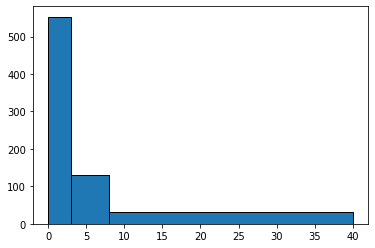

In [65]:
# Create custom bin edges
bins = [0, 3, 8, 40]

# Create a histogram using matplotlib with custom bins
n, bins, patches = plt.hist(
    df_combined_selected['FIRE_INCIDENT_COUNT_4_MONTH_BACKWARD_SHIFT'], 
    bins=bins, 
    edgecolor='black')

# Print the values in each bin
print(n)


### Find combined ranking for each row

In [66]:
# Use rank to assign ranks based on col1, and dense method for col2 in case of ties
df_combined['FIRE_COMBINED_RISK_RANK'] = df_combined['FIRE_RISK_MONTHLY_RANK'].rank(
    method='min')
mask = df_combined['FIRE_RISK_MONTHLY_RANK'].duplicated(keep=False)
df_combined.loc[mask, 'FIRE_COMBINED_RISK_RANK'] = df_combined[mask].groupby(
    'FIRE_RISK_MONTHLY_RANK')['FIRE_RISK_QUATERLY_RANK'].rank(method='dense')


In [67]:
df_combined.describe(include='all')

,1000_GRID_ID,MONTH,CODEMAMROT,CRIME_COUNT,Infractions entrainant la mort_CRIME_COUNT,Introduction_CRIME_COUNT,Méfait_CRIME_COUNT,Vol dans / sur véhicule à moteur_CRIME_COUNT,Vol de véhicule à moteur_CRIME_COUNT,Vols qualifiés_CRIME_COUNT,...,INCIDENT_COUNT_QUATERLY_TOTAL,UNITS_DEPLOYED_QUATERLY_TOTAL,TEMPERATURE_QUATERLY_MEAN,RAIN_QUATERLY_TOTAL,SNOW_QUATERLY_TOTAL,WINDSPEED_QUATERLY_MEAN,WINDGUSTS_QUATERLY_MEAN,FIRE_RISK_MONTHLY_RANK,FIRE_RISK_QUATERLY_RANK,FIRE_COMBINED_RISK_RANK
count,66402,66402,66402,66402.000000,66402.000000,66402.000000,66402.000000,66402.000000,66402.000000,66402.000000,...,66402.000000,66402.000000,66402.000000,6.640200e+04,6.640200e+04,66402.000000,66402.000000,66402.000000,66402.000000,66402.000000
unique,714,93,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,YnBvkIHPHFg=,2017-07,REM33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,93,714,5487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2.921704,0.002651,0.834644,0.637270,0.775368,0.517951,0.153821,...,52.021129,93.909069,6.944315,1.053305e+01,1.835757e+00,17.188548,37.748215,20.447833,47.279013,28.968525
std,NaN,NaN,NaN,5.415894,0.052860,1.979056,1.526182,1.915653,1.156541,0.552794,...,78.864914,144.346646,9.041850,5.645058e+00,2.166312e+00,1.524780,2.995264,3.815479,11.151419,8.370633
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-13.596285,-1.421085e-14,-1.931788e-13,9.712500,21.437500,1.000000,1.000000,1.000000
25%,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,-1.563844,6.823441e+00,2.400000e-02,16.126478,35.951882,19.000000,43.000000,24.000000
50%,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,20.000000,39.000000,7.381232,9.984731e+00,1.187399e+00,17.180753,37.534964,21.000000,50.000000,30.000000
75%,NaN,NaN,NaN,4.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,74.000000,131.000000,16.146921,1.317599e+01,3.148542e+00,18.150327,39.346198,23.000000,54.000000,35.000000


### Generate cumulative fire-risk levels for each row

In [68]:
""" 
    "Group_5%": "0-High Fire-Risk",
    "Group_15%": "1-Medium Fire-Risk",
    "Group_80%": "2-Low Fire-Risk"
"""

percentiles = df_combined['FIRE_COMBINED_RISK_RANK'].rank(pct=True)
bins = [0, 0.05, 0.20, 1]
labels = ['0-High Fire-Risk',
          '1-Medium Fire-Risk',
          '2-Low Fire-Risk']
df_combined['FIRE_RISK'] = pd.cut(percentiles, bins=bins, labels=labels)

In [69]:
df_combined.describe(include='all')

,1000_GRID_ID,MONTH,CODEMAMROT,CRIME_COUNT,Infractions entrainant la mort_CRIME_COUNT,Introduction_CRIME_COUNT,Méfait_CRIME_COUNT,Vol dans / sur véhicule à moteur_CRIME_COUNT,Vol de véhicule à moteur_CRIME_COUNT,Vols qualifiés_CRIME_COUNT,...,UNITS_DEPLOYED_QUATERLY_TOTAL,TEMPERATURE_QUATERLY_MEAN,RAIN_QUATERLY_TOTAL,SNOW_QUATERLY_TOTAL,WINDSPEED_QUATERLY_MEAN,WINDGUSTS_QUATERLY_MEAN,FIRE_RISK_MONTHLY_RANK,FIRE_RISK_QUATERLY_RANK,FIRE_COMBINED_RISK_RANK,FIRE_RISK
count,66402,66402,66402,66402.000000,66402.000000,66402.000000,66402.000000,66402.000000,66402.000000,66402.000000,...,66402.000000,66402.000000,6.640200e+04,6.640200e+04,66402.000000,66402.000000,66402.000000,66402.000000,66402.000000,66402
unique,714,93,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,YnBvkIHPHFg=,2017-07,REM33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2-Low Fire-Risk
freq,93,714,5487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53333
mean,NaN,NaN,NaN,2.921704,0.002651,0.834644,0.637270,0.775368,0.517951,0.153821,...,93.909069,6.944315,1.053305e+01,1.835757e+00,17.188548,37.748215,20.447833,47.279013,28.968525,NaN
std,NaN,NaN,NaN,5.415894,0.052860,1.979056,1.526182,1.915653,1.156541,0.552794,...,144.346646,9.041850,5.645058e+00,2.166312e+00,1.524780,2.995264,3.815479,11.151419,8.370633,NaN
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-13.596285,-1.421085e-14,-1.931788e-13,9.712500,21.437500,1.000000,1.000000,1.000000,NaN
25%,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,-1.563844,6.823441e+00,2.400000e-02,16.126478,35.951882,19.000000,43.000000,24.000000,NaN
50%,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,39.000000,7.381232,9.984731e+00,1.187399e+00,17.180753,37.534964,21.000000,50.000000,30.000000,NaN
75%,NaN,NaN,NaN,4.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,131.000000,16.146921,1.317599e+01,3.148542e+00,18.150327,39.346198,23.000000,54.000000,35.000000,NaN


### Generate fire-risk column with negative 1 shift

In [70]:
df_combined = df_combined.sort_values(['1000_GRID_ID', 'MONTH'])
df_combined['FIRE_RISK_1_MONTH_FORWARD_SHIFT'] = df_combined.groupby(['1000_GRID_ID'])[
    'FIRE_RISK'].shift(-1)

In [71]:
df_combined_last_month = df_combined[df_combined.isna().any(axis=1)]

In [72]:
df_combined.dropna(inplace=True)

In [73]:
df_combined.describe(include='all')

,1000_GRID_ID,MONTH,CODEMAMROT,CRIME_COUNT,Infractions entrainant la mort_CRIME_COUNT,Introduction_CRIME_COUNT,Méfait_CRIME_COUNT,Vol dans / sur véhicule à moteur_CRIME_COUNT,Vol de véhicule à moteur_CRIME_COUNT,Vols qualifiés_CRIME_COUNT,...,TEMPERATURE_QUATERLY_MEAN,RAIN_QUATERLY_TOTAL,SNOW_QUATERLY_TOTAL,WINDSPEED_QUATERLY_MEAN,WINDGUSTS_QUATERLY_MEAN,FIRE_RISK_MONTHLY_RANK,FIRE_RISK_QUATERLY_RANK,FIRE_COMBINED_RISK_RANK,FIRE_RISK,FIRE_RISK_1_MONTH_FORWARD_SHIFT
count,65688,65688,65688,65688.000000,65688.000000,65688.000000,65688.000000,65688.000000,65688.000000,65688.000000,...,65688.000000,6.568800e+04,6.568800e+04,65688.000000,65688.000000,65688.000000,65688.000000,65688.000000,65688,65688
unique,714,92,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3
top,YnBvkIHPHFg=,2017-07,REM33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2-Low Fire-Risk,2-Low Fire-Risk
freq,92,714,5428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52688,53110
mean,NaN,NaN,NaN,2.922086,0.002664,0.836713,0.638945,0.776869,0.513184,0.153711,...,7.008295,1.056695e+01,1.814051e+00,17.186840,37.772828,20.459399,47.296569,28.953340,NaN,NaN
std,NaN,NaN,NaN,5.410334,0.053003,1.981212,1.527666,1.915722,1.148182,0.552054,...,9.069491,5.653440e+00,2.160367e+00,1.528647,2.988427,3.823499,11.158934,8.386024,NaN,NaN
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-13.596285,-1.421085e-14,-1.931788e-13,9.712500,21.437500,1.000000,1.000000,1.000000,NaN,NaN
25%,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.695450,6.846618e+00,2.100000e-02,16.126478,35.986434,19.000000,43.000000,24.000000,NaN,NaN
50%,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.464216,9.989570e+00,1.141904e+00,17.180753,37.569896,21.000000,50.000000,30.000000,NaN,NaN
75%,NaN,NaN,NaN,4.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,16.224446,1.317656e+01,3.089484e+00,18.157613,39.373262,23.000000,54.000000,35.000000,NaN,NaN


In [74]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65688 entries, 4 to 69256
Data columns (total 82 columns):
 #   Column                                                               Non-Null Count  Dtype   
---  ------                                                               --------------  -----   
 0   1000_GRID_ID                                                         65688 non-null  object  
 1   MONTH                                                                65688 non-null  object  
 2   CODEMAMROT                                                           65688 non-null  object  
 3   CRIME_COUNT                                                          65688 non-null  float64 
 4   Infractions entrainant la mort_CRIME_COUNT                           65688 non-null  float64 
 5   Introduction_CRIME_COUNT                                             65688 non-null  float64 
 6   Méfait_CRIME_COUNT                                                   65688 non-null  float64 


In [75]:
df_combined_last_month.drop('FIRE_RISK_1_MONTH_FORWARD_SHIFT', axis=1)

,1000_GRID_ID,MONTH,CODEMAMROT,CRIME_COUNT,Infractions entrainant la mort_CRIME_COUNT,Introduction_CRIME_COUNT,Méfait_CRIME_COUNT,Vol dans / sur véhicule à moteur_CRIME_COUNT,Vol de véhicule à moteur_CRIME_COUNT,Vols qualifiés_CRIME_COUNT,...,UNITS_DEPLOYED_QUATERLY_TOTAL,TEMPERATURE_QUATERLY_MEAN,RAIN_QUATERLY_TOTAL,SNOW_QUATERLY_TOTAL,WINDSPEED_QUATERLY_MEAN,WINDGUSTS_QUATERLY_MEAN,FIRE_RISK_MONTHLY_RANK,FIRE_RISK_QUATERLY_RANK,FIRE_COMBINED_RISK_RANK,FIRE_RISK
96,-1xcNei0iJs=,2023-01,REM34,11.0,0.0,1.0,3.0,2.0,0.0,5.0,...,326.0,0.600812,5.844381,3.612692,17.880942,36.623303,19.0,21.0,11.0,0-High Fire-Risk
193,-5jH5xsoao4=,2023-01,REM15,3.0,0.0,0.0,0.0,1.0,2.0,0.0,...,133.0,0.707663,10.042257,3.730797,17.560058,36.237690,21.0,46.0,26.0,2-Low Fire-Risk
290,-HbRtrodjf8=,2023-01,66107,2.0,0.0,0.0,0.0,2.0,0.0,0.0,...,22.0,1.088889,11.733333,5.110000,17.915278,37.143056,20.0,52.0,38.0,2-Low Fire-Risk
387,-VjiKSd8OxM=,2023-01,REM34,10.0,0.0,3.0,2.0,1.0,1.0,3.0,...,290.0,1.120154,10.496809,3.646861,17.176345,35.198716,10.0,31.0,28.0,2-Low Fire-Risk
484,-fjD6s-8vdo=,2023-01,REM22,2.0,0.0,0.0,0.0,1.0,1.0,0.0,...,64.0,0.584171,9.244386,3.342360,17.296882,35.450670,19.0,51.0,41.0,2-Low Fire-Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68869,zZMpExLs4dw=,2023-01,66062,10.0,0.0,3.0,1.0,4.0,1.0,1.0,...,256.0,1.120996,9.264129,4.026951,17.208134,35.686563,16.0,26.0,19.0,1-Medium Fire-Risk
68966,zsOtd-zvzaI=,2023-01,REM20,11.0,0.0,1.0,3.0,5.0,1.0,1.0,...,401.0,1.171498,6.757448,4.183019,17.172180,35.289129,7.0,8.0,7.0,0-High Fire-Risk
69063,zsz3DbEvcrg=,2023-01,REM25,2.0,0.0,0.0,0.0,1.0,1.0,0.0,...,119.0,2.222067,10.230897,4.095179,18.298125,37.820625,20.0,46.0,32.0,2-Low Fire-Risk
69160,ztpTb_cD1hM=,2023-01,66007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,33.0,1.841459,11.916098,4.240968,17.725207,36.306636,21.0,52.0,32.0,2-Low Fire-Risk


In [76]:
df_combined_last_month.describe(include='all')

,1000_GRID_ID,MONTH,CODEMAMROT,CRIME_COUNT,Infractions entrainant la mort_CRIME_COUNT,Introduction_CRIME_COUNT,Méfait_CRIME_COUNT,Vol dans / sur véhicule à moteur_CRIME_COUNT,Vol de véhicule à moteur_CRIME_COUNT,Vols qualifiés_CRIME_COUNT,...,TEMPERATURE_QUATERLY_MEAN,RAIN_QUATERLY_TOTAL,SNOW_QUATERLY_TOTAL,WINDSPEED_QUATERLY_MEAN,WINDGUSTS_QUATERLY_MEAN,FIRE_RISK_MONTHLY_RANK,FIRE_RISK_QUATERLY_RANK,FIRE_COMBINED_RISK_RANK,FIRE_RISK,FIRE_RISK_1_MONTH_FORWARD_SHIFT
count,714,714,714,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,...,714.000000,714.000000,7.140000e+02,714.000000,714.000000,714.000000,714.000000,714.000000,714,0
unique,714,1,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0
top,8JKtlvTVPxA=,2023-01,REM33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2-Low Fire-Risk,NaN
freq,1,714,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,645,NaN
mean,NaN,NaN,NaN,2.886555,0.001401,0.644258,0.483193,0.637255,0.956583,0.163866,...,1.058210,7.414470,3.832651e+00,17.345732,35.483795,19.383754,45.663866,30.365546,NaN,NaN
std,NaN,NaN,NaN,5.909060,0.037424,1.760419,1.375144,1.905572,1.708675,0.617450,...,0.822142,3.652540,1.741398e+00,1.102479,2.750028,2.790701,10.317086,6.665689,NaN,NaN
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-2.841667,0.066667,-1.179057e-13,13.043750,25.422917,1.000000,1.000000,1.000000,NaN,NaN
25%,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.727914,5.886622,3.192784e+00,16.979599,34.588657,19.000000,43.000000,30.000000,NaN,NaN
50%,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.958360,6.823441,3.670559e+00,17.288522,35.332876,21.000000,50.000000,33.000000,NaN,NaN
75%,NaN,NaN,NaN,4.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,1.333861,8.168529,4.089562e+00,17.714918,36.214237,21.000000,53.000000,33.000000,NaN,NaN


# Output file

In [77]:
# Output file to folder
file_name = 'df_fe_combined_last_month.csv'
if os.path.exists(file_name):
    os.remove(file_name)
df_combined_last_month.to_csv(
    'Data/Processed_Datasets/Combined_tables/' + file_name)


In [78]:
# Output file to folder
file_name = 'df_fe_combined.csv'
if os.path.exists(file_name):
    os.remove(file_name)
df_combined.to_csv('Data/Processed_Datasets/Combined_tables/' + file_name)